## Calculation of the splines for a given set of points
$M = (n\times 2)$-array of points to collocate.

$x = M[0:,0]$, vector of x coordinates

$y = M[0:,1]$, vector of y coordinates

The following code is based on the original code by A. Kuri-Morales

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sort(x,y):
    n = len(x)
    for i in range(0,n):
        tmin=x[i]
        imin=i
        for j in range(i,n):
            if (tmin>x[j]):
                tmin=x[j]
                imin=j
            #endIf
        #endFor
        if (imin!=i):
            x[imin]=x[i]
            x[i]=tmin
            tmin=y[imin]
            y[imin]=y[i]
            y[i]=tmin
    return x, y
#endSort

In [3]:
# Calculate the coefficients of the splines, the second derivatives s_i
# returns the array s of said coefficients
def splineCoefs(x,y):
    n = len(x)
    sig = np.zeros(n)
    tau = np.zeros(n)
    for i in range(0,n-1):
        Him1 = x[i]-x[i-1]
        Hi = x[i+1]-x[i]
        if (Hi == 0):
            print("Dos valores de \"x\" iguales!!!")
            sys.exit()
            return
        #endif
        temp = (Him1/Hi)*(sig[i]+2) + 2
        sig[i+1] = -1/temp
        d = 6*((y[i+1]- y[i])/Hi-(y[i]-y[i-1])/Him1)/Hi
        tau[i+1]=(d - Him1*tau[i]/Hi)/temp
    #endfor  
    s = np.zeros(n)
    for i in range(1,n-1):
        ib = (n-1)-i
        s[ib]= sig[ib+1] * s[ib+1] + tau[ib+1]
    #endfor
    return s
#endsplinesCoefs

In [4]:
# Evaluates the spline at a new point
def Spline(x,y,s,new):
    n = len(x)
    i = 0
    while(i < n and x[i] <= new):
        i += 1
    #endWhile
    if(x[n-1] <= new):
        return y[n-1]
    if(i == n):
        print("New value not in range")
        return
    a = x[i]-new
    b = new-x[i-1]
    hi = x[i]-x[i-1]
    beta = a*s[i-1]*(a*a/hi-hi)/6+b*s[i]*(b*b/hi-hi)/6+(a*y[i-1]+b*y[i])/hi
    return beta
#endSpline

In [5]:
# Example, M = array of points to collocate
M = np.array([[-1,-1],[-0.8,-1],[-0.6,-1],[-0.4,-1],[-0.2,-1],
              [0,1],[0.2,1],[0.4,1],[0.6,1],[0.8,1],
              [1,2],[1.2,2],[1.4,2],[1.6,2], [1.8,2],[2,2]])
#M = np.array([[-1,-1],[-0.8,0],[-0.6,1],[-0.4,-1],[-0.2,0],
#              [0,1],[0.2,-1],[0.4,0],[0.6,1],[0.8,-1],
#              [1,2],[1.2,2],[1.4,2],[1.6,2], [1.8,2],[2,2]])
# Example on documentation
#M = np.array([[1,2],[3,5],[6,3],[8,4.5]])
# sort the vectors in M, separating first and second coordinates
x,y = sort(M[0:,0], M[0:,1])
# Calculte the second derivatives
s = splineCoefs(x,y)
print("Coefficients:", s)

# New points to evaluate the spline at
N = 1000 # Number of new points
xs = np.linspace(-1.0, 2, num=N) # N new numbers in the range
# Evaluate the spline
ys = np.zeros(N)
i = 0
for a in xs:
    ys[i] = Spline(x, y, s, a)
    if(N < 100):
        print(a, ys[i])
    i += 1

Coefficients: [   0.           -2.22523788    7.90899574  -29.41074508  109.73398458
 -109.52519326   28.36678845   -3.94196053  -12.59894633   54.33774584
  -54.75203703   14.67040227   -3.92957204    1.04788588   -0.26197147
    0.        ]


(-2, 3)

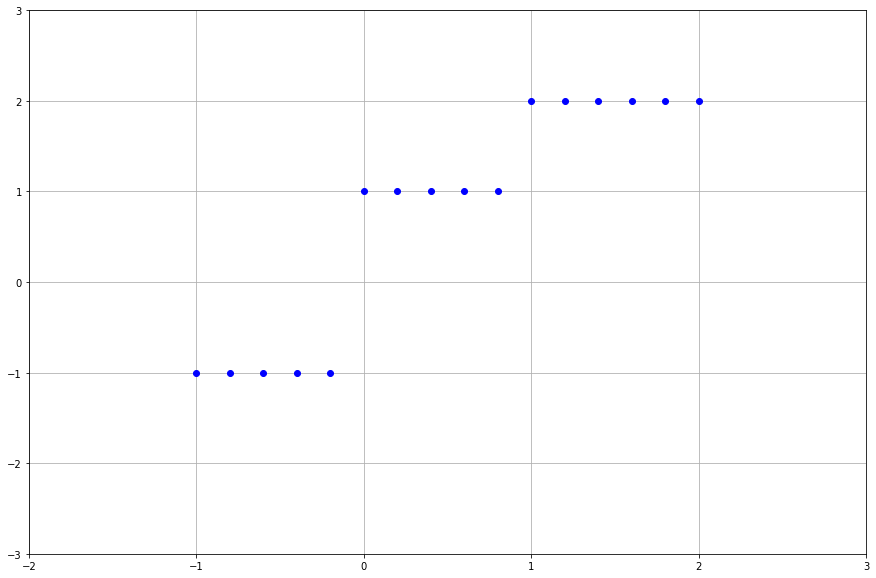

In [14]:
plt.figure(figsize=(15,10))
plt.plot(x, y, 'bo')
plt.grid(True)
plt.ylim((-3,3))
plt.xlim((-2,3))

(-2, 3)

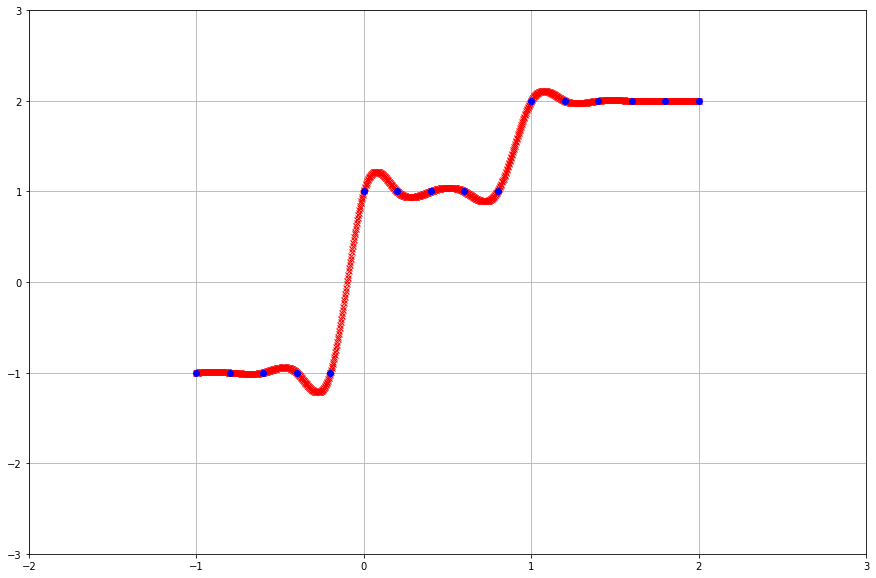

In [16]:
plt.figure(figsize=(15,10))
plt.plot(xs,ys,'rx')
plt.plot(x, y, 'bo')
plt.grid(True)
plt.ylim((-3,3))
plt.xlim((-2,3))